In [1]:
# Import libraries

import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Function to load X values
def load_color_inputs():
    X_train_color = pickle.load(open('E:/training_color.pkl', "rb"))
    X_valid_color = pickle.load(open('E:/validation_color.pkl', "rb"))
    X_test_color = pickle.load(open('E:/testing_color.pkl', "rb"))
    return X_train_color, X_valid_color, X_test_color

# Function to load y values
def load_outputs():
    y_train = pickle.load(open('E:/y_training.pkl', "rb"))
    y_valid = pickle.load(open('E:/y_validation.pkl', "rb"))
    y_test = pickle.load(open('E:/y_testing.pkl', "rb"))
    return y_train, y_valid, y_test

# Function to reshape data
def reshape_input_vect(vect, size=(128, 64, 3)):
    inp_vect = []
    for i in range(vect.shape[0]):
        inp_vect.append(np.reshape(vect[i], (128, 64, 3)))
    return np.asarray(inp_vect)

# Load in X data
X_train_color, X_valid_color, X_test_color = load_color_inputs()

# Load in y data
y_train_color, y_valid_color, y_test_color = load_outputs()

# To categorical y-values [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
y_train_color = to_categorical(y_train_color, num_classes = None, dtype='float32')
y_valid_color = to_categorical(y_valid_color, num_classes = None, dtype='float32')
y_test_color = to_categorical(y_test_color, num_classes = None, dtype='float32')

In [8]:
# Shuffle data
np.random.seed(200)
X_train_color, X_valid_color, X_test_color = np.random.permutation(X_train_color), np.random.permutation(
    X_valid_color), np.random.permutation(X_test_color)
np.random.seed(200)
y_train_color, y_valid_color, y_test_color = np.random.permutation(y_train_color), np.random.permutation(
    y_valid_color), np.random.permutation(y_test_color)

new shape: (1920, 128, 64, 3)
new shape: (640, 128, 64, 3)
new shape: (640, 128, 64, 3)


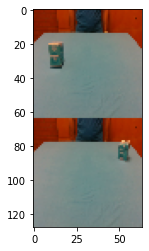

In [10]:
# Reshape data
X_train_color, X_valid_color, X_test_color = reshape_input_vect(X_train_color), reshape_input_vect(X_valid_color), reshape_input_vect(X_test_color)
print("new shape:", X_train_color.shape)
print("new shape:", X_valid_color.shape)
print("new shape:", X_test_color.shape)

# Show first training image
plt.imshow(X_train_color[0])
plt.show()

In [11]:
### CNN MODEL

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(128, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.summary()

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_color, y_train_color, epochs=20, verbose=1, validation_data=(X_valid_color, y_valid_color))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 60, 32)       2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 6, 128)       0

In [12]:
[loss, acc] = model.evaluate(X_valid_color, y_valid_color ,verbose=1)
print("Accuracy:" + str(acc))

20/20 [==============================] - 0s 6ms/step - loss: 0.1705 - accuracy: 0.9828
Accuracy:0.9828125238418579


In [13]:
model.evaluate(X_test_color, y_test_color)

20/20 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9734


[0.18045088648796082, 0.973437488079071]

In [14]:
model.save('CNN_1_color_model',save_format='h5')

In [15]:
model = tf.keras.models.load_model('CNN_1_color_model')

In [16]:
# Predict the values from the validation dataset and convert predictions classes to one hot vectors
categories = ['Left to right', "Pull", "Push", "Right to left"]
y_pred = np.argmax(model.predict(X_test_color), axis=-1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_color, axis=-1)

print(classification_report(y_true, y_pred, target_names=categories, digits=4))

20/20 [==============================] - 0s 15ms/step
               precision    recall  f1-score   support

Left to right     0.9515    0.9812    0.9662       160
         Pull     0.9689    0.9750    0.9720       160
         Push     0.9935    0.9625    0.9778       160
Right to left     0.9811    0.9750    0.9781       160

     accuracy                         0.9734       640
    macro avg     0.9738    0.9734    0.9735       640
 weighted avg     0.9738    0.9734    0.9735       640



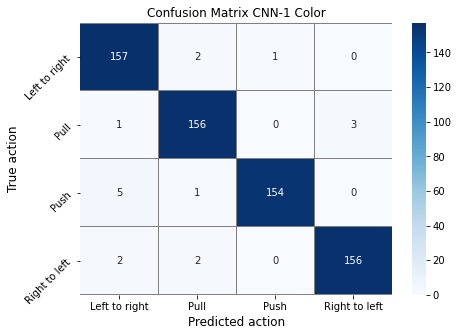

In [17]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred) 
# plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix CNN-1 Color")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()